In [1]:
#Plot ns Files

In [58]:
import numpy as np
import csky as cy
import matplotlib.pyplot as plt
import histlite as hl
cy.plotting.mrichman_mpl()
import pandas as pd
import matplotlib

In [59]:
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
job_base='baseline_analysis'
plot_dir = cy.utils.ensure_dir('/home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/plotting/plots')
base_dir = cy.utils.ensure_dir('/home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/analyses/{}'.format(job_base))

In [3]:
#stacking

In [6]:
df_orig = pd.read_hdf('/cvmfs/icecube.opensciencegrid.org/users/shiqiyu/selected_xray_fullsky_seyferts_10yr.h5')
idx = np.logical_and(df_orig['DECdeg'] < -5, df_orig['DECdeg'] > -80)
idx2 = df_orig['neutrino_expectation'] >=1
df = df_orig[idx&idx2].sort_values(by='neutrino_expectation', ascending=False).copy(deep=True)

In [7]:
src_dec = df['DECdeg']
src_ra = df['RAdeg']
src_name = df['CTPT_NAME']
src_nus = df['neutrino_expectation']

In [10]:
ps_sig_gamma = np.load(base_dir + '/stacking/seyfert_southernsky_30_corona_powerlaw_weightedfit_nosigsub_sig.dict', allow_pickle=True)
ps_sig = np.load(base_dir + '/stacking/seyfert_southernsky_30_corona_flux_nosigsub_sig.dict', allow_pickle=True)


In [11]:
#ps_sig_gamma

In [12]:
def get_data(df, ntrues, var='ns'):
    vals = []
    gammas = []
    re_ntrues = []
    
    for ntrue in ntrues:
        ns = df['nsig'][ntrue][var].tolist()
        re_ntrues += (np.repeat(ntrue, len(ns))).tolist()
        vals += ns
        try:
            gammas += df['nsig'][ntrue]['gamma'].tolist()
        except:
            continue
    #print(len(vals))
    #data.append(np.percentile(vals, [2.5, 16,50,84, 97.5]))
    #means.append(np.mean(vals))
    if gammas:
        return(vals, gammas, re_ntrues)
    else:
        return(vals, re_ntrues)

In [30]:
def plot_all_bias_only(axs, ns, ntrues, name):

    n_sig_max = np.max(ntrues) +1

    n_sigs = np.r_[:n_sig_max:10]
    #fig, axs = plt.subplots()
    fig = plt.gcf()
    dns = np.mean(np.diff(n_sigs))
    ns_bins = np.r_[n_sigs - 0.5*dns, n_sigs[-1] + 0.5*dns]
    expect_kw = dict(color='C0', ls='--', lw=1, zorder=-10)

    ax = axs
    h = hl.hist((ntrues, ns), bins=(ns_bins, 100))
    hl.plot1d(ax, h.contain_project(1),errorbands=True, drawstyle='default')#, label=name)#, label='$\sin\delta$ = {:.3f}'.format(np.sin(np.deg2rad(dec))))

    lim = ns_bins[[0, -1]]
    ax.set_xlim(ax.set_ylim(lim))
    ax.plot(lim, lim, **expect_kw)
    ax.set_aspect('equal')

    ax.set_xlabel(r'$n_{inj}$',size=20)
    ax.grid()
    ax.set_ylabel(r'$n_s$',size=20)
    ax.set_title(name,size=20)
    ax.legend(loc=2, prop={'size': 20})
    plt.tight_layout()

    return fig, axs

In [53]:
def plot_all_bias_only_sig(axs, ns, ns_nosig, ntrues, ntrues_nosig, name1, name2):

    n_sig_max = np.max(ntrues) +1

    n_sigs = np.r_[:n_sig_max:10]
    #fig, axs = plt.subplots()
    fig = plt.gcf()
    dns = np.mean(np.diff(n_sigs))
    ns_bins = np.r_[n_sigs - 0.5*dns, n_sigs[-1] + 0.5*dns]
    expect_kw = dict(color='C0', ls='--', lw=1, zorder=-10)

    ax = axs
    h = hl.hist((ntrues, ns), bins=(ns_bins, 100))
    h_nosig = hl.hist((ntrues_nosig, ns_nosig), bins=(ns_bins, 100))

    hl.plot1d(ax, h.contain_project(1),errorbands=True, drawstyle='default', label=name1, color='b')#, label = name)

    hl.plot1d(ax, h_nosig.contain_project(1),errorbands=True, drawstyle='default', label=name2, color='g')

    lim = ns_bins[[0, -1]]
    ax.set_xlim(ax.set_ylim(lim))
    ax.plot(lim, lim, **expect_kw)
    ax.set_aspect('equal')

    ax.set_xlabel(r'$n_{inj}$',size=25)
    ax.grid()
    ax.set_ylabel(r'$n_s$',size=25)

    ax.legend(loc=2, prop={'size': 20})
    plt.tight_layout()

    return fig, axs

In [60]:
def plot_all_bias_gamma(axs, gamma, ntrues):

    n_sig_max = np.max(ntrues) +1

    n_sigs = np.r_[:n_sig_max:10]
    #fig, axs = plt.subplots()
    fig = plt.gcf()
    dns = np.mean(np.diff(n_sigs))
    ns_bins = np.r_[n_sigs - 0.5*dns, n_sigs[-1] + 0.5*dns]
    expect_kw = dict(color='C0', ls='--', lw=1, zorder=-10)
    #expect_gamma = 3.0

    ax = axs
    h = hl.hist((ntrues, gamma), bins=(ns_bins, 100))
    hl.plot1d(ax, h.contain_project(1),errorbands=True, drawstyle='default')
    #ax.axhline(expect_gamma, **expect_kw)
    #ax.set_ylim(0,5) #axs.get_xlim())
    
    ax.grid()
    #axs.set_ylabel(r'$n_{sig}$', size=15)
    axs.set_ylabel(r'$\gamma$',size=25)
    #ax.set_aspect('equal')
    ax.set_xlabel(r'$n_{inj}$',size=25)

    ax.legend(loc=2, prop={'size': 20})
    plt.tight_layout()

    return fig, axs

In [21]:
ntrue = np.linspace(0, 200, 21)[1:-1]
print(ntrue)

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.
 150. 160. 170. 180. 190.]


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 720x480 with 0 Axes>

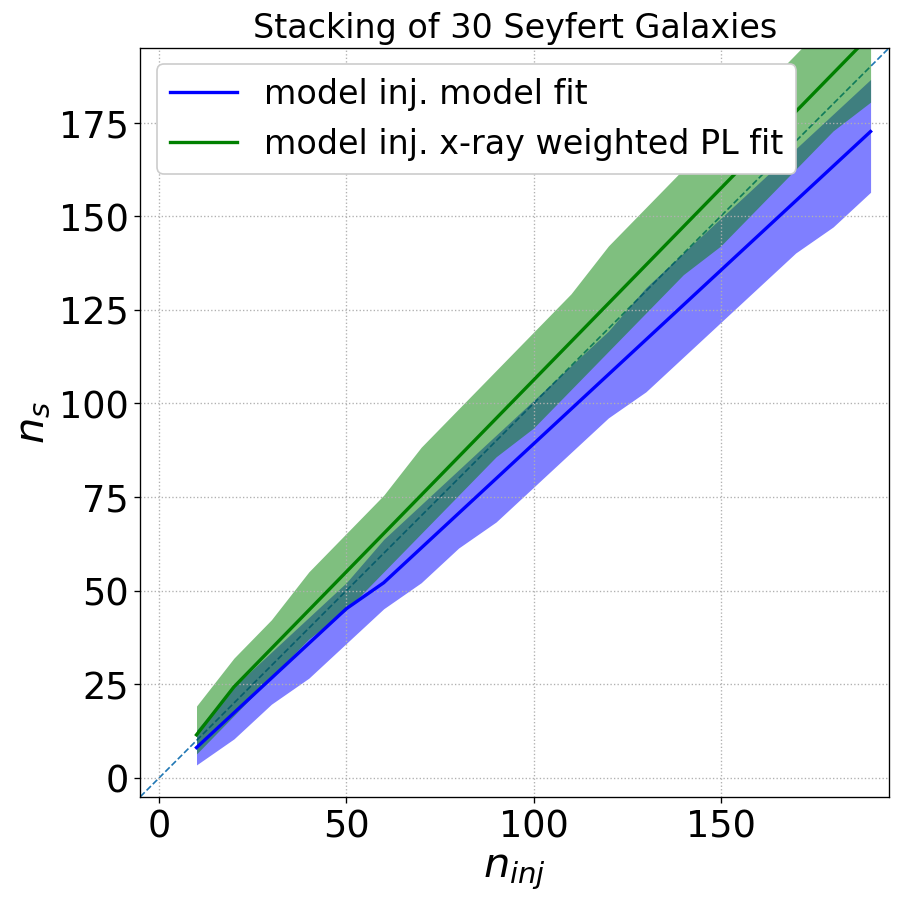

In [61]:
plt.rcParams["text.usetex"] = False
plt.figure()#figsize=(36,24))
fig, ax = plt.subplots( figsize=(8,8))
df=ps_sig['cutoff_TeV'][np.inf]
ns, ntrues = get_data(df, ntrue)
name1='model inj. model fit'
df_gamma=ps_sig_gamma['cutoff_TeV'][np.inf]
ns1, gamma1, ntrues1 = get_data(df_gamma, ntrue)
name2='model inj. x-ray weighted PL fit'

plot_all_bias_only_sig(ax, ns, ns1, ntrues, ntrues1, name1, name2)
plt.title("Stacking of 30 Seyfert Galaxies",size=20)
plt.tight_layout()
plt.savefig('./plots/ESTES_southernsky30_bias_only_stacking_plots_modelinj_modelfit_vs_weightedplfit.png')

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

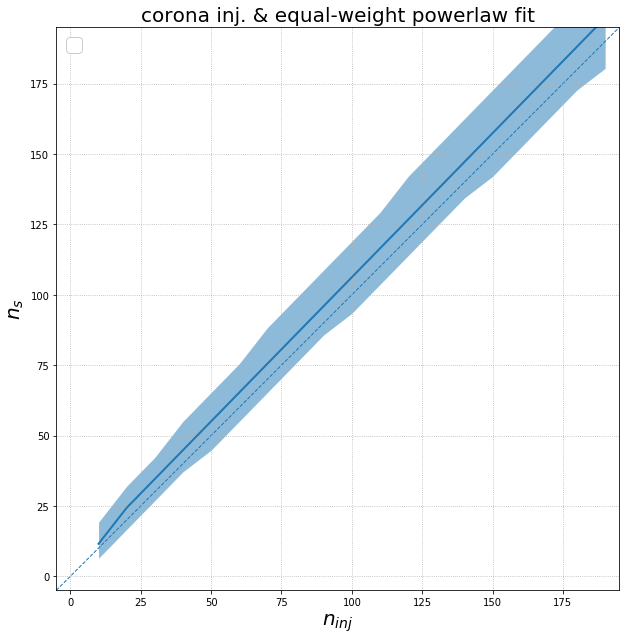

In [31]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,9))#, figsize=(8,8))
df_gamma=ps_sig_gamma['cutoff_TeV'][np.inf]
ns_gamma, gamma, ntrues_gamma = get_data(df_gamma, ntrue)
plot_all_bias_only(ax, ns_gamma, ntrues_gamma, name='corona inj. & equal-weight powerlaw fit')
plt.tight_layout()
plt.savefig('./plots/ESTES_southernsky_bias_only_stacking_plots_corona_inj_weight_powerlaw_fit.png')



No handles with labels found to put in legend.


<Figure size 720x480 with 0 Axes>

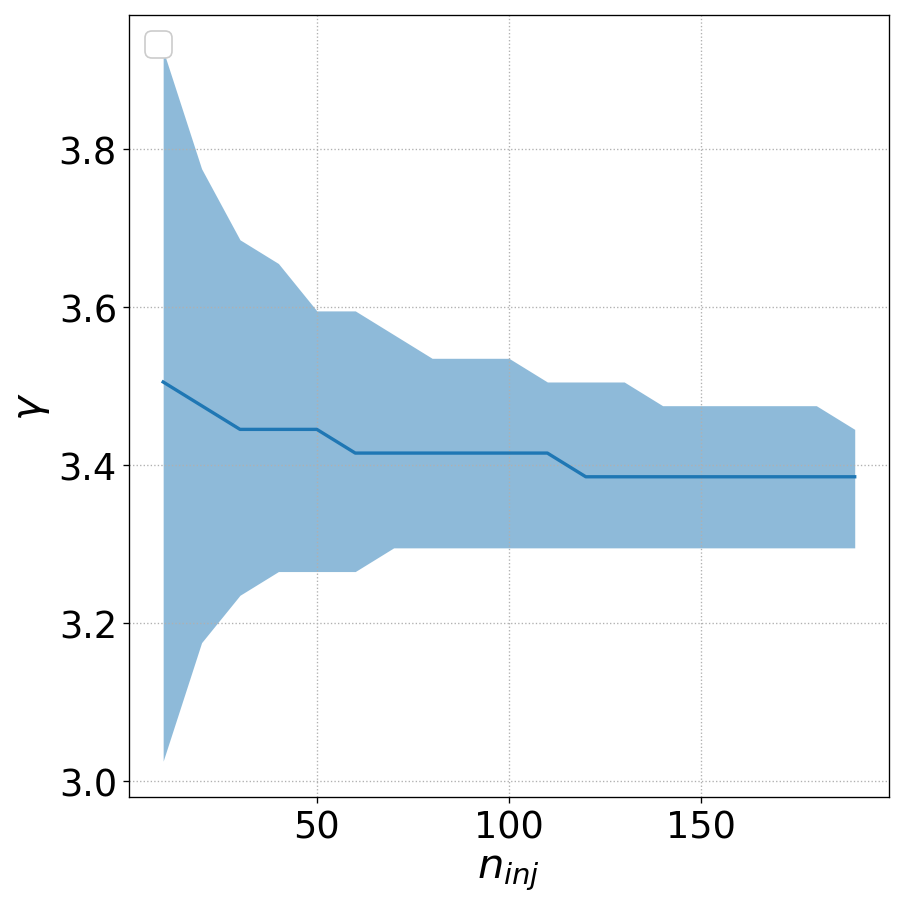

In [62]:
plt.figure()
fig, ax = plt.subplots(figsize=(8,8))
plot_all_bias_gamma(ax, gamma, ntrues_gamma)
plt.tight_layout()
plt.savefig('./plots/ESTES_southernsky_gamma_only_stacking_plots_corona_inj_weighted_powerlaw_fit.png')

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

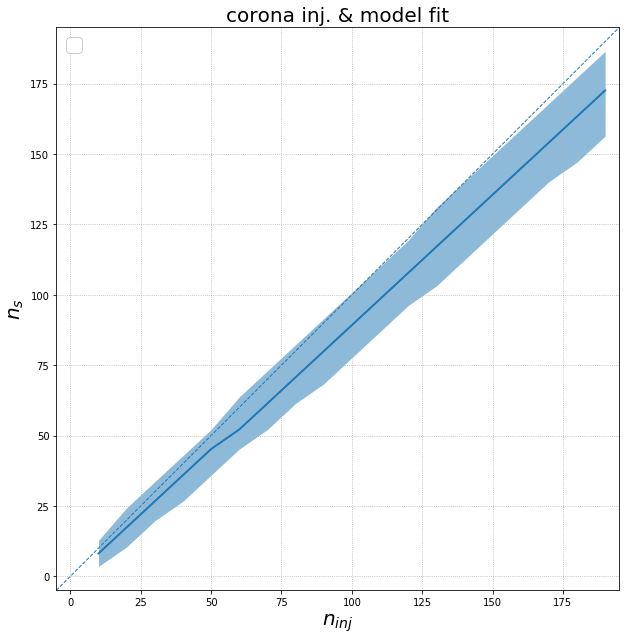

In [33]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,9))#, figsize=(8,8))

plot_all_bias_only(ax, ns, ntrues, name='corona inj. & model fit')
plt.tight_layout()
plt.savefig('./plots/ESTES_southernsky_bias_only_stacking_plots_corona_inj_model_fit.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x480 with 0 Axes>

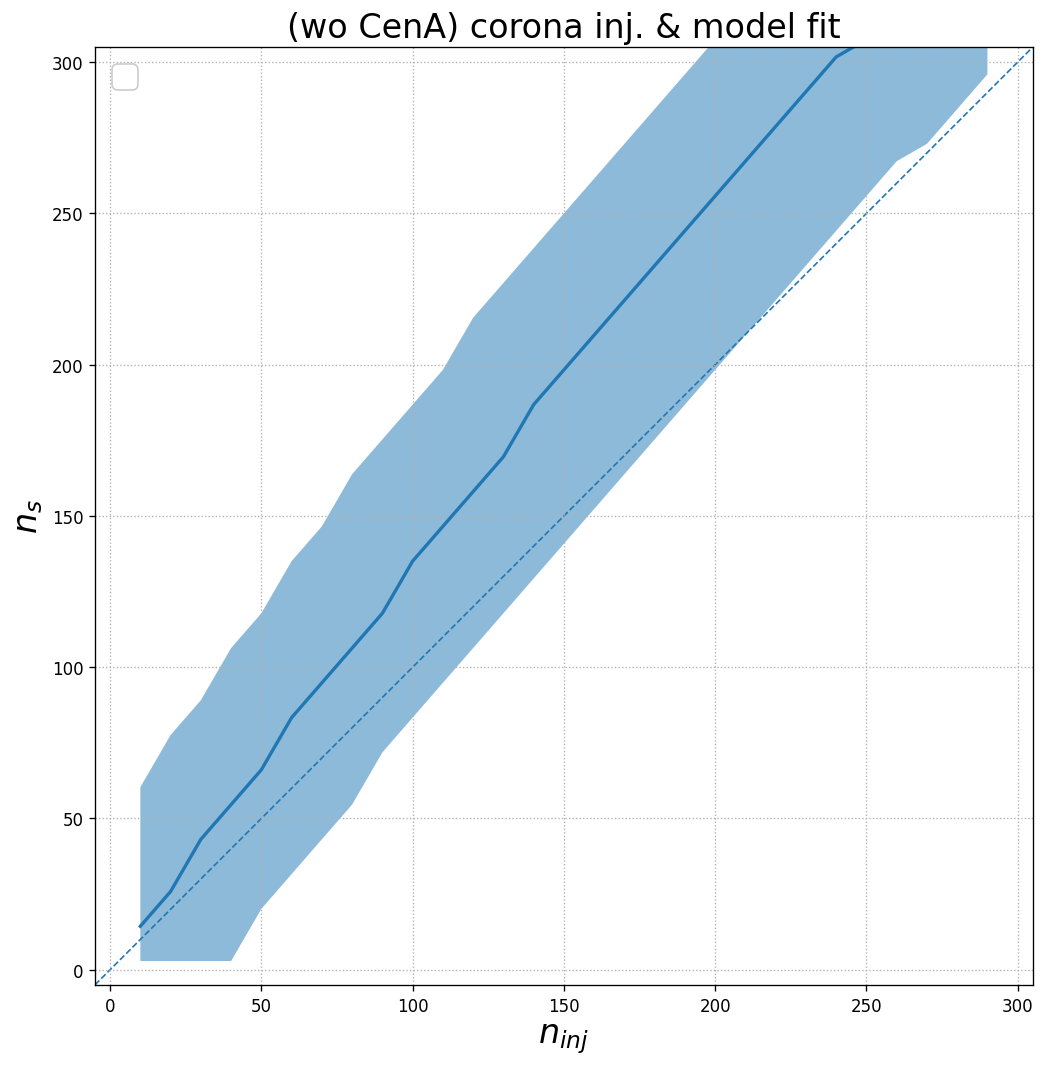

In [74]:
plt.figure()
fig, ax = plt.subplots(figsize=(8,8))
df29=ps_sig_29['cutoff_TeV'][np.inf]
ns29, ntrues29 = get_data(df29, ntrue)
plot_all_bias_only(ax, ns29, ntrues29, name='(wo CenA) corona inj. & model fit')
plt.tight_layout()
plt.savefig('./plots/southernsky_bias_only_29_stacking_plots_corona_inj_model_fit.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x480 with 0 Axes>

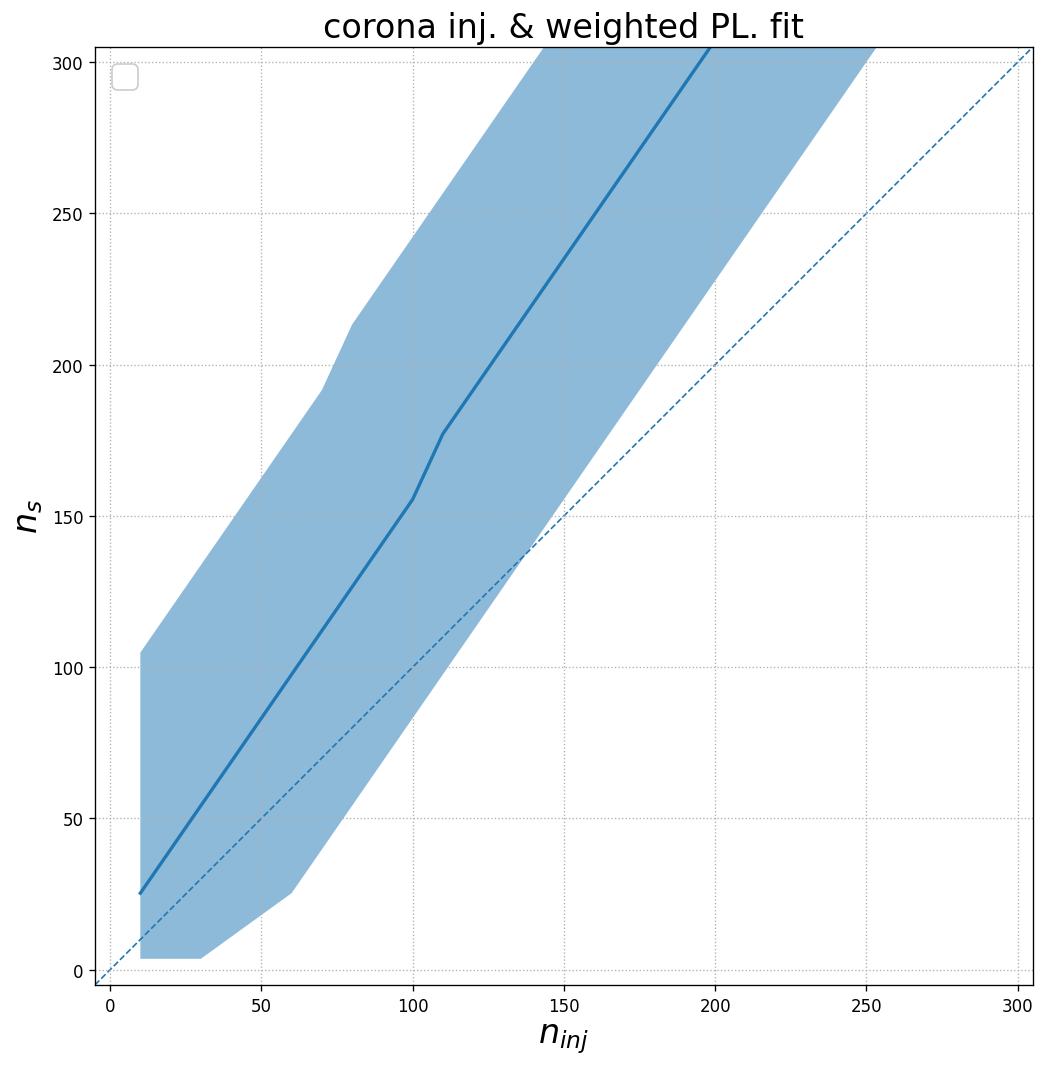

In [59]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,9))#, figsize=(8,8))

plot_all_bias_only(ax, ns1, ntrues1, name='corona inj. & weighted PL. fit')
plt.tight_layout()
plt.savefig('./plots/southernsky_bias_only_stacking_plots_corona_inj_weighted_PL_fit.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x480 with 0 Axes>

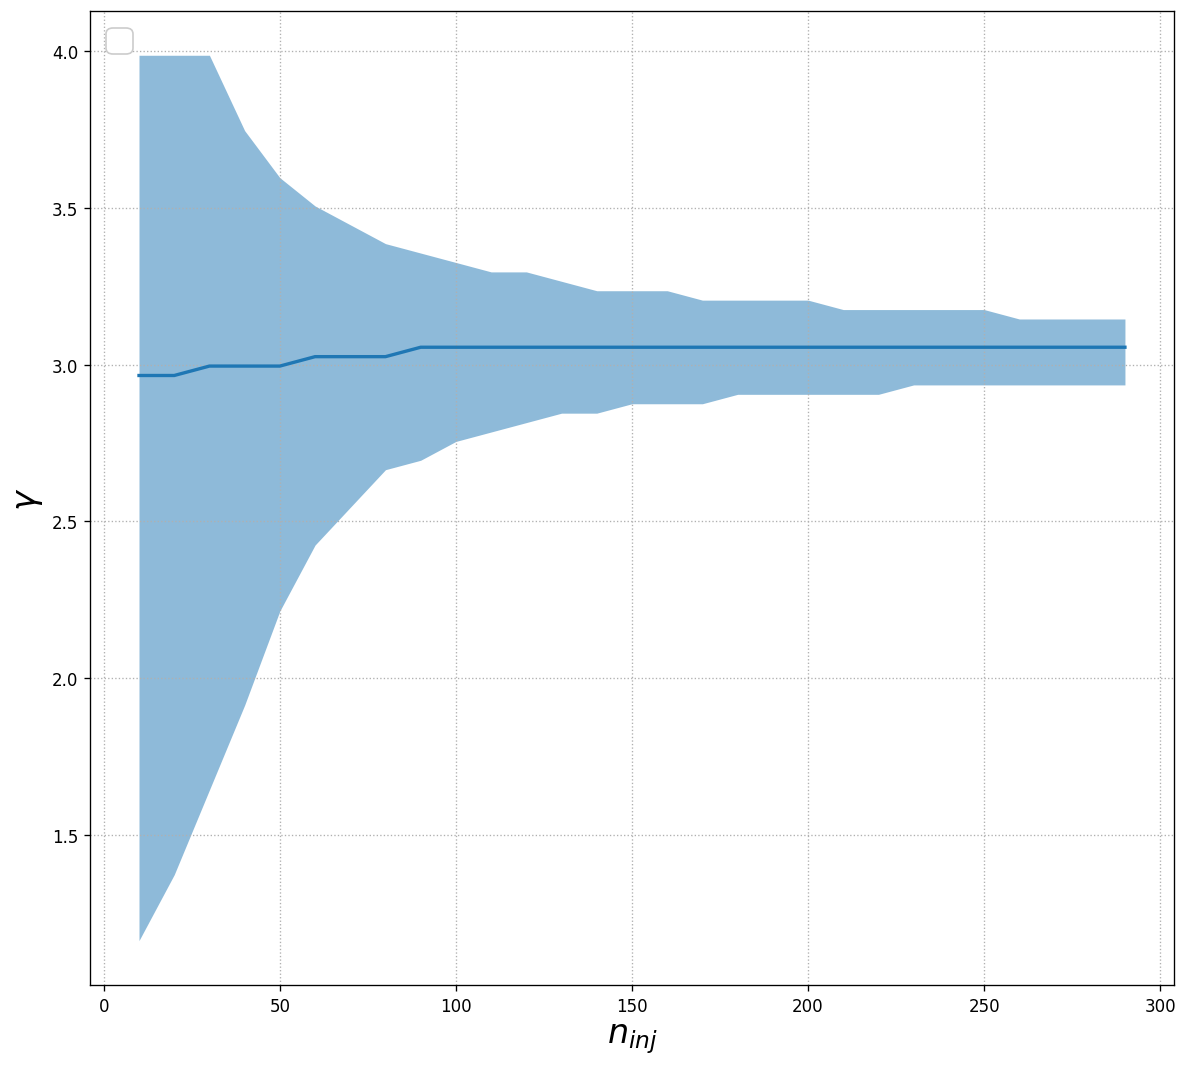

In [52]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,9))#, figsize=(8,8))
plot_all_bias_gamma(ax, gamma1, ntrues1)
plt.tight_layout()
plt.savefig('./plots/southernsky_gamma_only_stacking_plots_corona_inj_weighted_powerlaw_fit.png')


In [34]:
def plot_ps_ns(dec):
    b = cy.dists.Chi2TSD(ps_bkg['dec'][dec])
    title = 'BKG PS: $\delta$: {:.2f}'.format(dec)

    fig, ax = plt.subplots()
    h = b.get_hist(bins=30)
    hl.plot1d(ax, h, crosses=True,
              label='{} bg trials'.format(b.n_total))
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=2, ls='--',
                label=r'$\chi^2[{:.2f}\sf{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_xlabel(r'TS')
    ax.set_ylabel(r'number of trials')
    ax.set_title(title)
    ax.axvline(b.isf_nsigma(5), c='r', ls = '--', label='5$\sigma$ (From Fit)')
    ax.axvline(b.isf_nsigma(3), c='r', ls = ':', label='3$\sigma$ (From Fit)')
    ax.legend()
    plt.tight_layout()
    cy.plotting.saving(cy.utils.ensure_dir(plot_dir + '/ps/bkg'), 'ps_bkg_dec_{:.2f}'.format(dec))
    plt.close()

In [38]:
#cats = ['corona_flux', '29_corona_flux']
cats = ['30_corona_flux', '30_corona_powerlaw_weightedfit']
#names = ['model inj. model fit']
bkgs = {}
for cat in cats:
    bkgs[cat] = np.load(base_dir + '/stacking/seyfert_southernsky_{}_bg.dict'.format(cat), allow_pickle=True)

In [45]:
def plot_stacking_bkg(cat, name):
    b = cy.dists.Chi2TSD(bkgs[cat])
    title = 'BKG Stacking: {}'.format(name)

    fig, ax = plt.subplots()
    h = b.get_hist(bins=30)
    hl.plot1d(ax, h, crosses=True,
              label='{} bg trials'.format(b.n_total))
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=2, ls='--',
                label=r'$\chi^2[{:.2f}\sf{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_xlabel(r'TS')
    ax.set_ylabel(r'number of trials')
    ax.set_title(title)
    ax.axvline(b.isf_nsigma(5), c='r', ls = '--', label='5$\sigma$ (From Fit)')
    ax.axvline(b.isf_nsigma(3), c='r', ls = ':', label='3$\sigma$ (From Fit)')
    ax.legend()
    plt.tight_layout()
    cy.plotting.saving(cy.utils.ensure_dir(plot_dir + '/bkg'), '30_stacking_{}_bkg'.format(cat))

In [46]:
plt.rcParams["text.usetex"] = False

-> /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/plotting/plots/bkg/30_stacking_30_corona_flux_bkg


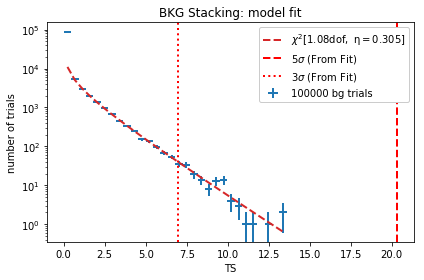

In [47]:
plot_stacking_bkg('30_corona_flux', 'model fit')

-> /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/plotting/plots/bkg/30_stacking_30_corona_powerlaw_weightedfit_bkg


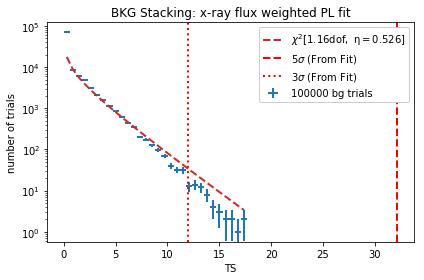

In [48]:
plot_stacking_bkg('30_corona_powerlaw_weightedfit', 'x-ray flux weighted PL fit')